<a href="https://colab.research.google.com/github/ahcamachod/1921-machine-learning-clasificacion-entre-bastidores/blob/aula-3/tecnicas_de_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning: Clasificación entre Bastidores**

En este notebook estaremos desarrollando varias técnicas de clasificación para un conjunto de datos de una empresa de telecomunicaciones.

En caso de que desees consultar el dataset original, este se encuentra en el siguiente enlace:
https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets?select=churn-bigml-20.csv

## Aula 1

### 1.2 Importando los datos

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 

datos = pd.read_csv('/content/drive/MyDrive/clasificacion/customer_churn.csv')
datos.head()

,Mayor65Anos,Conyuge,Dependientes,MesesDeContrato,TelefonoFijo,VariasLineasTelefonicas,ServicioDeInternet,SeguridadOnline,BackupOnline,SeguroEnDispositivo,SoporteTecnico,TVaCable,StreamingDePeliculas,TipoDeContrato,PagoOnline,FormaDePago,CuentaMensual,Churn
0,0,Si,No,1,No,SinServicioTelefonico,DSL,No,Si,No,No,No,No,Mensual,Si,ChequeDigital,29.85,No
1,0,No,No,34,Si,No,DSL,Si,No,Si,No,No,No,Anual,No,ChequePapel,56.95,No
2,0,No,No,2,Si,No,DSL,Si,Si,No,No,No,No,Mensual,Si,ChequePapel,53.85,Si
3,0,No,No,45,No,SinServicioTelefonico,DSL,Si,No,Si,Si,No,No,Anual,No,DebitoAutomatico,42.30,No
4,0,No,No,2,Si,No,FibraOptica,No,No,No,No,No,No,Mensual,Si,ChequeDigital,70.70,Si


In [3]:
datos.shape

(7043, 18)

### 1.3 Tipos de variables

In [4]:
datos.head()

,Mayor65Anos,Conyuge,Dependientes,MesesDeContrato,TelefonoFijo,VariasLineasTelefonicas,ServicioDeInternet,SeguridadOnline,BackupOnline,SeguroEnDispositivo,SoporteTecnico,TVaCable,StreamingDePeliculas,TipoDeContrato,PagoOnline,FormaDePago,CuentaMensual,Churn
0,0,Si,No,1,No,SinServicioTelefonico,DSL,No,Si,No,No,No,No,Mensual,Si,ChequeDigital,29.85,No
1,0,No,No,34,Si,No,DSL,Si,No,Si,No,No,No,Anual,No,ChequePapel,56.95,No
2,0,No,No,2,Si,No,DSL,Si,Si,No,No,No,No,Mensual,Si,ChequePapel,53.85,Si
3,0,No,No,45,No,SinServicioTelefonico,DSL,Si,No,Si,Si,No,No,Anual,No,DebitoAutomatico,42.30,No
4,0,No,No,2,Si,No,FibraOptica,No,No,No,No,No,No,Mensual,Si,ChequeDigital,70.70,Si


In [5]:
traduccion = {'Si':1, 'No':0}

datos_modificados = datos[['Conyuge','Dependientes',
                           'TelefonoFijo','PagoOnline','Churn']].replace(traduccion)

datos_modificados.head()

,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [6]:
datos_dummy = pd.get_dummies(datos.drop(columns=['Conyuge','Dependientes',
                           'TelefonoFijo','PagoOnline','Churn'],axis=1))

In [7]:
datos_final = pd.concat([datos_modificados,datos_dummy], axis=1)
datos_final.head()

,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Churn,Mayor65Anos,MesesDeContrato,CuentaMensual,VariasLineasTelefonicas_No,VariasLineasTelefonicas_Si,...,StreamingDePeliculas_No,StreamingDePeliculas_Si,StreamingDePeliculas_SinServicioDeInternet,TipoDeContrato_Anual,TipoDeContrato_Bienal,TipoDeContrato_Mensual,FormaDePago_ChequeDigital,FormaDePago_ChequePapel,FormaDePago_DebitoAutomatico,FormaDePago_TarjetaDeCredito
0,1,0,0,1,0,0,1,29.85,0,0,...,1,0,0,0,0,1,1,0,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,1,0,0,0,1,0,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,45,42.30,0,0,...,1,0,0,1,0,0,0,0,1,0
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,0,1,1,0,0,0


### 1.5 Definición Formal

Información para la clasificación:

$X$ = inputs (datos de entrada)

$y$ = outputs (datos de saída)

In [8]:
pd.set_option('display.max_columns',39)

In [9]:
datos_final.head()

,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Churn,Mayor65Anos,MesesDeContrato,CuentaMensual,VariasLineasTelefonicas_No,VariasLineasTelefonicas_Si,VariasLineasTelefonicas_SinServicioTelefonico,ServicioDeInternet_DSL,ServicioDeInternet_FibraOptica,ServicioDeInternet_No,SeguridadOnline_No,SeguridadOnline_Si,SeguridadOnline_SinServicioDeInternet,BackupOnline_No,BackupOnline_Si,BackupOnline_SinServicioDeInternet,SeguroEnDispositivo_No,SeguroEnDispositivo_Si,SeguroEnDispositivo_SinServicioDeInternet,SoporteTecnico_No,SoporteTecnico_Si,SoporteTecnico_SinServicioDeInternet,TVaCable_No,TVaCable_Si,TVaCable_SinServicioDeInternet,StreamingDePeliculas_No,StreamingDePeliculas_Si,StreamingDePeliculas_SinServicioDeInternet,TipoDeContrato_Anual,TipoDeContrato_Bienal,TipoDeContrato_Mensual,FormaDePago_ChequeDigital,FormaDePago_ChequePapel,FormaDePago_DebitoAutomatico,FormaDePago_TarjetaDeCredito
0,1,0,0,1,0,0,1,29.85,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,45,42.30,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0



$y_i$ = $f(x_i)$

In [10]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

In [11]:
#ymaria=?

Nuevos pares de información = ($Xmaria$, $ymaria$)

### 1.6 Balanceo de los datos

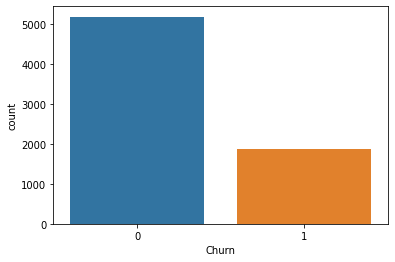

In [12]:
import seaborn as sns

sns.countplot(x='Churn', data=datos_final)

In [13]:
datos_final.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [14]:
from imblearn.over_sampling import SMOTE

X = datos_final.drop(columns='Churn', axis=1)
y = datos_final['Churn']

smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X,y)

In [15]:
datos_final.shape

(7043, 39)

In [16]:
datos_final = pd.concat([X,y], axis=1)
datos_final.shape

(10348, 39)

In [17]:
datos_final.sample(5)

,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Mayor65Anos,MesesDeContrato,CuentaMensual,VariasLineasTelefonicas_No,VariasLineasTelefonicas_Si,VariasLineasTelefonicas_SinServicioTelefonico,ServicioDeInternet_DSL,ServicioDeInternet_FibraOptica,ServicioDeInternet_No,SeguridadOnline_No,SeguridadOnline_Si,SeguridadOnline_SinServicioDeInternet,BackupOnline_No,BackupOnline_Si,BackupOnline_SinServicioDeInternet,SeguroEnDispositivo_No,SeguroEnDispositivo_Si,SeguroEnDispositivo_SinServicioDeInternet,SoporteTecnico_No,SoporteTecnico_Si,SoporteTecnico_SinServicioDeInternet,TVaCable_No,TVaCable_Si,TVaCable_SinServicioDeInternet,StreamingDePeliculas_No,StreamingDePeliculas_Si,StreamingDePeliculas_SinServicioDeInternet,TipoDeContrato_Anual,TipoDeContrato_Bienal,TipoDeContrato_Mensual,FormaDePago_ChequeDigital,FormaDePago_ChequePapel,FormaDePago_DebitoAutomatico,FormaDePago_TarjetaDeCredito,Churn
7049,0,0,1,1,0,1,79.446255,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
7864,0,0,1,1,0,29,69.110787,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
6840,0,1,1,1,0,1,19.300000,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0
7243,0,0,1,1,0,51,97.859087,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
6937,0,0,0,1,0,28,35.750000,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0


In [18]:
datos_final.Churn.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

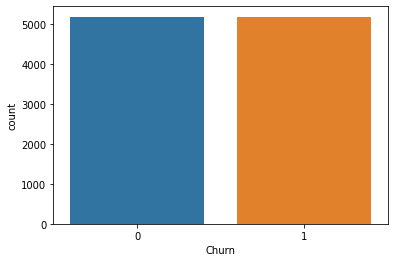

In [19]:
sns.countplot(x='Churn', data= datos_final)

## Aula 2

### 2.2 KNN entre bastidores

In [20]:
Xmaria

[[0,
  0,
  1,
  1,
  0,
  0,
  39.9,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1]]

In [21]:
#ymaria = ?

In [22]:
X = datos_final.drop(columns='Churn', axis=1)
y = datos_final['Churn']

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [24]:
X_std[0]

array([ 1.26542767, -0.52756038, -3.06083934,  0.8149851 , -0.41334384,
       -1.10768354, -1.32176205, -0.88482108, -0.83366906,  3.18604176,
        1.51268338, -1.04386816, -0.44617598,  0.868102  , -0.5173695 ,
       -0.44617598, -0.95871762,  1.57389661, -0.44617598,  1.04326198,
       -0.64211419, -0.44617598,  0.87997069, -0.52426638, -0.44617598,
        1.18643645, -0.77707385, -0.44617598,  1.2033586 , -0.78992399,
       -0.44617598, -0.41989297, -0.44648735,  0.73773107,  1.30292044,
       -0.47943196, -0.43617215, -0.42576817])

In [25]:
Xmaria_std = scaler.transform(pd.DataFrame(Xmaria, columns=X.columns))

Distancia Euclidiana:

$$\sqrt{\sum_{i=1}^k(a_{i}-b_{i})^2}$$

In [26]:
import numpy as np

a = Xmaria_std
b = X_std[0]
exponenciacion = np.square(a-b)
suma = np.sum(exponenciacion)
distancia = np.sqrt(suma)
print(f'La distancia euclidiana de María con respecto al primer registro del dataset es: {distancia}')

La distancia euclidiana de María con respecto al primer registro del dataset es: 9.546326613865215


### 2.3 Implementando el modelo KNN

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(metric='euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [29]:
prevision_knn = knn.predict(X_test)

In [30]:
prevision_knn

array([1, 0, 1, ..., 1, 1, 1])

## Aula 3

### 3.3 Implementando el modelo Bernoulli Naive Bayes

## Aula 4

### 4.3 Implementando el modelo de Árbol de Decisión

## Aula 5

### 5.1 Matriz de Confusión

![img](https://miro.medium.com/max/799/1*XsFcyoLXNdAkbSfNGnxhEg.png)

### 5.2 Exactitud

> A partir del cálculo de la matriz de confusión logramos inferir otras métricas, como por ejemplo la exactitud.

$exactitud$ = ${TP + TN \over TP + FP + TN + FN}$

### 5.3 Precisión

> Otra métrica importante es la precisión, que calcula cuántas observaciones fueron clasificadas correctamente como positivas ($TP$).

$precision$ = ${TP \over TP + FP}$

### 5.4 Recall

> Además, existe una métrica conocida como Recall o sensibilidad, que calcula qué tan bien el modelo clasifica correctamente un resultado positivo ($TP$).

$recall$ = ${TP \over TP + FN}$
